In [1]:
"""Generate a voxel dataset by interpolating a scalar
which is only known on a scattered set of points or mesh.
Available interpolation kernels are: shepard, gaussian, voronoi, linear.
The middle layer is the result of thresholding the volume
between 0.3 and 0.4 and assigning it the new value of 0.9"""
from vedo import *
import numpy as np

settings.default_backend = 'vtk'  # or k3d, ipyvtk, or vtk

npts = 500                       # nr. of points of known scalar value
coords = np.random.rand(npts, 3) # range is [0, 1]
scals = np.abs(coords[:, 2])     # let the scalar be the z of point itself

apts = Points(coords)
apts.pointdata['scals'] = scals

vol = apts.tovolume(kernel='shepard', radius=0.2, dims=(90,90,90))
vol.cmap(["tomato", "g", "b"])   # set color transfer functions

# this produces a hole in the histogram in the range [0.3, 0.4]'
vol.threshold(above=0.3, below=0.4, replace=0.9) # replace voxel value in [vmin,vmax]

show(apts, vol, axes=1, elevation=-30)


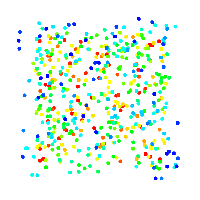

In [2]:
apts